<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/Raz%C3%A3o_Pre%C3%A7o_M%C3%A9dia_de_Pre%C3%A7o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 25.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [83]:
weg = yf.download('WEGE3.SA', start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [94]:
weg['media'] = weg.Close.rolling(30).mean()
weg['ret_dia'] = weg.Close.pct_change().rolling(30).mean()
weg['vol'] = weg.Close.pct_change().rolling(30).std()

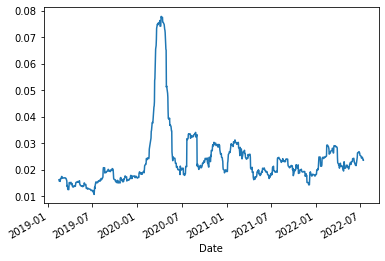

In [93]:
weg['vol'].plot()

In [95]:
weg['razao_ret_vol'] = weg['ret_dia']/weg['vol']
weg['razao'] = weg['Close']/weg['media']

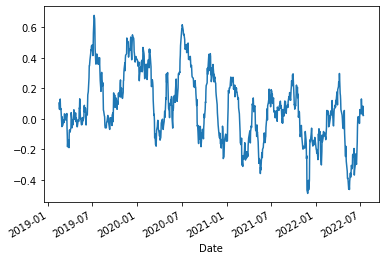

In [96]:
weg['razao_ret_vol'].plot()

In [86]:
weg.razao.mean()

1.0191236820211746

In [87]:
import matplotlib.pyplot as plt

In [88]:
import pandas as pd
import numpy as np

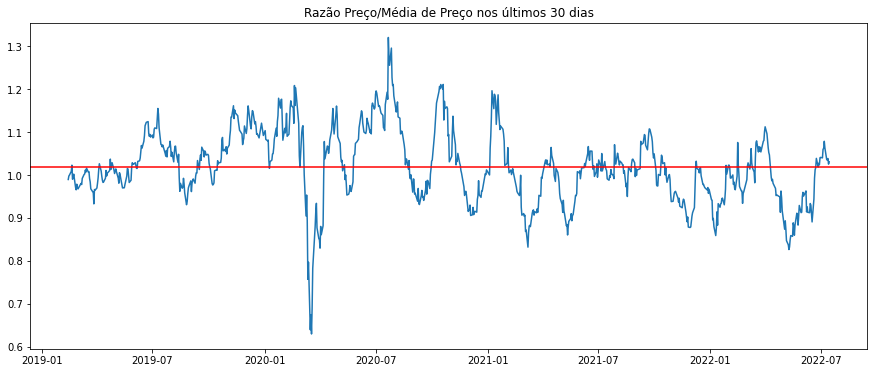

In [89]:
vol = weg.razao
y = vol
x = pd.to_datetime(vol.index)
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x,y)
plt.axhline(y=np.mean(y), color='r', linestyle='-')

plt.title(f'Razão Preço/Média de Preço nos últimos 30 dias')

plt.show()